# Linear Regression with Boston House Prices

![Photo from Ryan Mercier in Unsplash](../../resources/ryan-mercier-3U7tnALnvas-unsplash.jpg)  
*Photo from Ryan Mercier in Unsplash*


- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in \$1000's


## Downloading the dataset

import os
import sys
module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from kaggle_utils.utils import KaggleUtils

dataset_name = 'vikrishnan/boston-house-prices'
with KaggleUtils() as api:
    api.kaggle_download_dataset(dataset_name)

## Problem Statement

Suppose your are an engineer in Capsule State Corp., which is a real state company. Capsule State Corp is a looking for new invesments at boston. Your task is to **create an automated system to estimate the cost of houses**, using the dataset provided by the data compilation team. The estimates of the system will be used as a reference for the selling cost of a house.

## Data Preparation and Cleaning

For our analysis, we are going to use the dataset contained in the file `housing.csv`, which was downloaded from Kaggle. We need to prepare our data by filling up any missing values. First we need to create a pandas dataframe using the downloaded file.

In [1]:
# %%
%pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
housing_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'Bk', 'LSTAT', 'MEDV']

In [4]:
housing_df = pd.read_csv('housing.csv', delimiter='\s+', header=None, names=housing_columns)

In [5]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Let us look at the information contained in our dataset. The objective of the system is to estimate the median value of owner-occupied homes (MEDV) using our dataset.

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  Bk       506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


The dataset contains 506 rows and 14 columns. Each row of the dataset contains information about one customer. Also, it seems that our dataset do not have any missing values, how wonderful!. Let's look at the basic statistics of our data.

In [7]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Only the CRIM, AGE, and Bk seems to be skewed as the median (50% percentile) and the min value differs significantly.

## Exploratory Data Analysis

Before training our ML model, we need to explore and analyze our dataset. The objective of this step is to help us understand the distributions and correlations in our data.

In [8]:
%pip install plotly matplotlib seaborn nbformat --quiet

Note: you may need to restart the kernel to use updated packages.


In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [10]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### MEDV

For instance, we need to take a look at our main variable of interest median value of owner-occupied homes (MEDV). This is the parameter that we are trying to predict.

In [11]:
fig = px.histogram(housing_df, x="MEDV", marginal='box')
fig.show()

It appears that we have some outliners, but inside the IQR we have what seems to be *a normal distribution* with a **median value of \$21,200 dollars**. The presence of outliers show us that the median is a better central tendency measurement.

### Correlations

One of the most useful things to look at when analyzing data for a ML regression model is the pearson correlation value. Let's calculate it for our dataset.

In [12]:
corr_matrix = housing_df.corr()[['MEDV']]
corr_matrix.transpose()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Bk,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


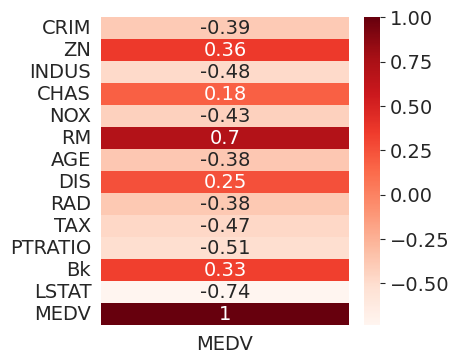

In [13]:
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, cmap='Reds', annot=True);

We are only interesed in somewhat strong correlations.

In [14]:
corr_matrix.loc[(corr_matrix["MEDV"] >= 0.4) | (corr_matrix["MEDV"] <= -0.4)].sort_values(by="MEDV").T

,LSTAT,PTRATIO,INDUS,TAX,NOX,RM,MEDV
MEDV,-0.737663,-0.507787,-0.483725,-0.468536,-0.427321,0.69536,1.0


We have 6 paramerters that have some correlation with MEDV. The strongest correlation is the [proportion of population that is lower status (LSTAT)](https://opendata.stackexchange.com/questions/15740/what-does-lower-status-mean-in-boston-house-prices-dataset) just followed by the average number of rooms (RM) and the pupil-teacher ratio by town (PTRATIO) respectively. The other parameters seems to be helpful, althogh their correlations are not as strong as the previosly mentioned.

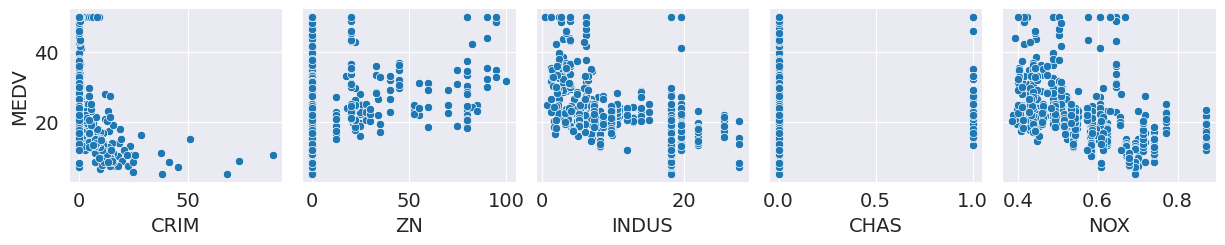

In [15]:
sns.pairplot(housing_df, y_vars=["MEDV"], x_vars=housing_df.columns[:5]);

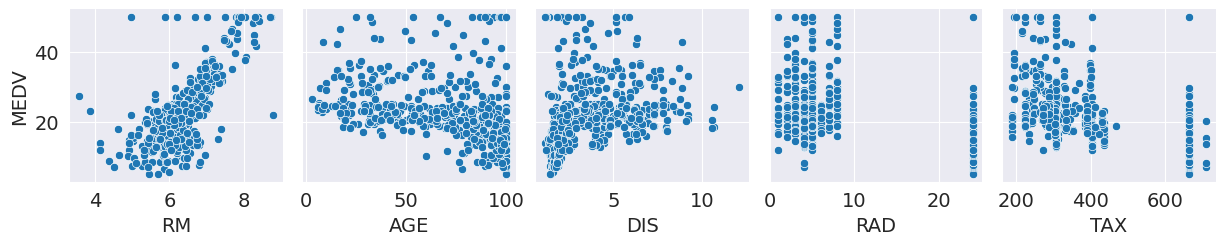

In [16]:
sns.pairplot(housing_df, y_vars=["MEDV"], x_vars=housing_df.columns[5:10]);

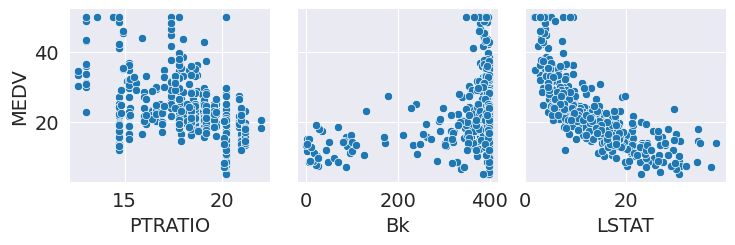

In [17]:
sns.pairplot(housing_df, y_vars=["MEDV"], x_vars=housing_df.columns[10:-1]);

We can visualize that the aforementioned correlations; we can see, that effectively, LSTAT, PTRATIO, INDUS, TAX, NOX, RM, and MEDV have the greatest correlations.

### LSTAT

In [18]:
fig = px.histogram(housing_df, x="LSTAT", marginal='box')
fig.show()

In [19]:
fig = px.scatter(housing_df,
                 x="LSTAT", 
                 y="MEDV", 
                 color="MEDV", 
                 opacity=0.7,
                 #trendline="ols",
                 #trendline_options=dict(log_x=True),
                 width=1200, 
                 height=600)
fig.show()

### RM

In [20]:
fig = px.histogram(housing_df, x="RM", marginal='box')
fig.show()

In [21]:
fig = px.scatter(housing_df,
                 x="RM", 
                 y="MEDV", 
                 color="MEDV", 
                 opacity=0.7,
                 #trendline="ols",
                 width=1200, 
                 height=600)
fig.show()

## Linear Regression

In [22]:
%pip install statsmodels --quiet

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
independent_variables = ["LSTAT", "PTRATIO", "INDUS", "TAX", "NOX", "RM"]
inputs = housing_df[independent_variables]
targets = housing_df["MEDV"]
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (506, 6)
targes.shape : (506,)


In [27]:
model.fit(inputs, targets)

LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
predictions = model.predict(inputs)

In [30]:
mean_squared_error(targets, predictions)

26.92800231045072

In [31]:
model.coef_

array([-5.45934588e-01, -9.13819473e-01,  8.71873392e-02, -2.90110504e-03,
       -3.40311735e+00,  4.65592779e+00])

In [32]:
model.intercept_

19.14581846057883

### Model Improvement

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(housing_df[independent_variables])

StandardScaler()

In [35]:
scaler.mean_

array([ 12.65306324,  18.4555336 ,  11.13677866, 408.23715415,
         0.55469506,   6.28463439])

In [36]:
scaler.var_

array([5.08939794e+01, 4.67772630e+00, 4.69714297e+01, 2.83486236e+04,
       1.34010989e-02, 4.92695216e-01])

In [37]:
scaled_inputs = scaler.transform(housing_df[independent_variables])
scaled_inputs_df = pd.DataFrame(data=scaled_inputs, columns=independent_variables)
scaled_inputs_df.head()

,LSTAT,PTRATIO,INDUS,TAX,NOX,RM
0,-1.075562,-1.459000,-1.287909,-0.666608,-0.144217,0.413672
1,-0.492439,-0.303094,-0.593381,-0.987329,-0.740262,0.194274
2,-1.208727,-0.303094,-0.593381,-0.987329,-0.740262,1.282714
3,-1.361517,0.113032,-1.306878,-1.106115,-0.835284,1.016303
4,-1.026501,0.113032,-1.306878,-1.106115,-0.835284,1.228577


In [38]:
scaled_inputs_df.describe()

,LSTAT,PTRATIO,INDUS,TAX,NOX,RM
count,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02
mean,-3.089316e-16,-4.212704e-16,2.106352e-16,0.000000,-1.965929e-16,-1.088282e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00
min,-1.531127e+00,-2.707379e+00,-1.557842e+00,-1.313990,-1.465882e+00,-3.880249e+00
25%,-7.994200e-01,-4.880391e-01,-8.676906e-01,-0.767576,-9.130288e-01,-5.686303e-01
50%,-1.812536e-01,2.748590e-01,-2.110985e-01,-0.464673,-1.442174e-01,-1.084655e-01
75%,6.030188e-01,8.065758e-01,1.015999e+00,1.530926,5.986790e-01,4.827678e-01
max,3.548771e+00,1.638828e+00,2.422565e+00,1.798194,2.732346e+00,3.555044e+00


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(scaled_inputs_df, targets, test_size=0.3)

In [41]:
model_improved = LinearRegression()
model_improved.fit(inputs_train, targets_train)

LinearRegression()

In [42]:
predictions_improved = model.predict(inputs_test)

In [43]:
model_improved.coef_

array([-3.76172529, -1.75897003,  0.54228663, -0.43815461, -0.66188913,
        3.63332366])

In [44]:
model_improved.intercept_

22.20205569978693

In [45]:
mean_squared_error(targets_test, predictions_improved)

62.72488045071375

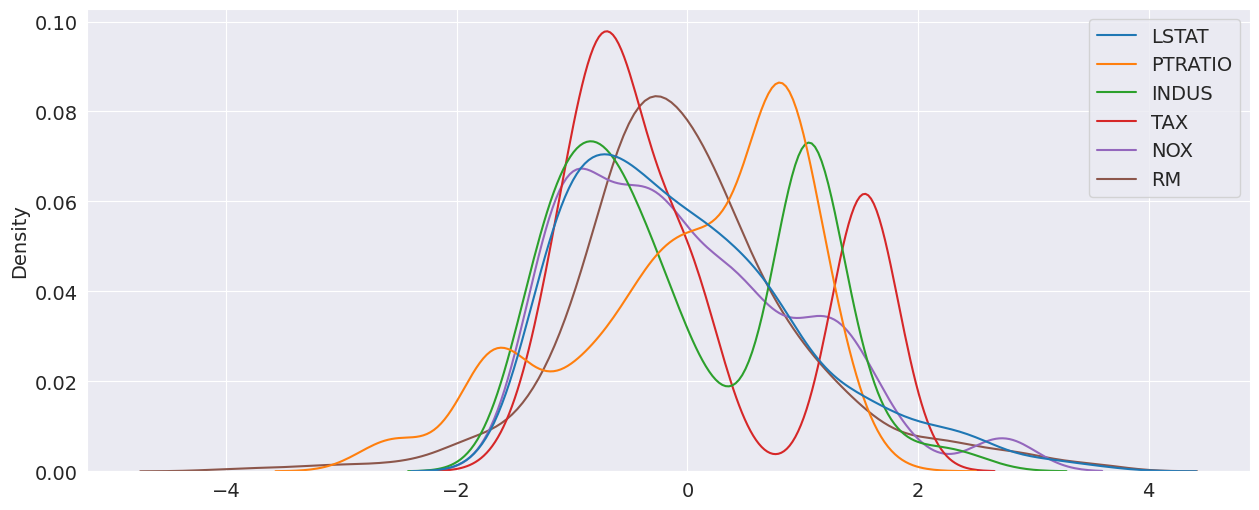

In [46]:
sns.kdeplot(scaled_inputs_df);

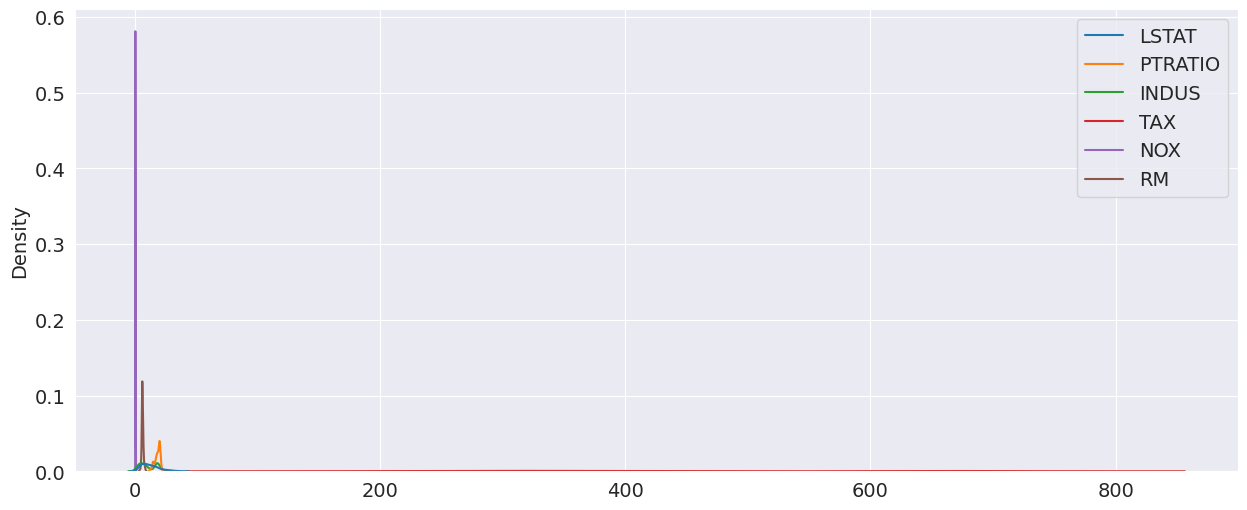

In [47]:
sns.kdeplot(housing_df[independent_variables]);

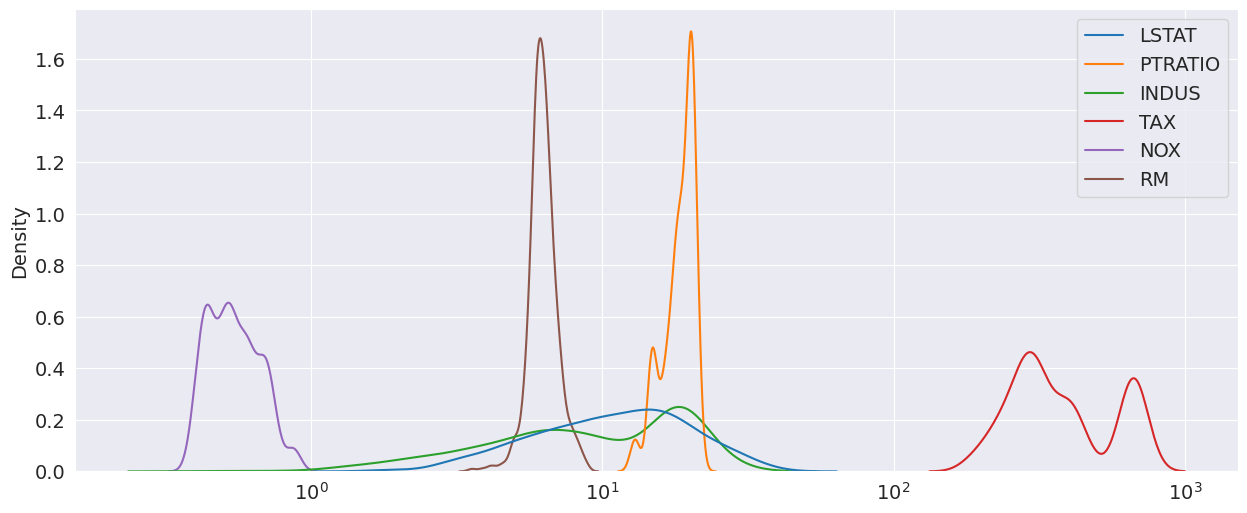

In [48]:
sns.kdeplot(housing_df[independent_variables], log_scale=True);